<a href="https://colab.research.google.com/github/keithl93/Python_Projects/blob/main/loan_eligibility_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loan Eligibility Prediction

In [ ]:
# importing libaries that contain modules with functions needed to perform the work we need
import pandas as pd  #working with datasets.. functions for reading/exporting, cleaning, analyzing
import numpy as np  #working with arrays.. linear algebra, matrices
import matplotlib.pyplot as plt  #creating visualizations
%matplotlib inline
import seaborn as sns  #creating visualizations
from sklearn import model_selection  
from sklearn.model_selection import train_test_split #setting the train-test split datasets for predictive models
import warnings  #avoid printing the warning messages from functions
warnings.filterwarnings("ignore")

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# reading loan data from the directory
# always good to define a 
filepath="/content/drive/MyDrive/Colab Notebooks/loan_data.csv"
df = pd.read_csv(filepath)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
# data size
df.shape

(614, 13)

In [11]:
# data structure and format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
# descriptive statistics - qualititately describes the distribution of the numerical data 
# Interquartile range - measures variability.. skewed distributions or outliers
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
# distribution of the values in each column
# better to have even distribution instead of uneven 
# e.g. Gender: there are 4x males than females in this data
# e.g. Loan_Status: there are more than 2x Yes for loans than No.
# There is bias in the target variable of Loan_Status since there are 2x Yes
# bias: overweighted or overrepresented
for col in df.columns:
    print(col)
    print(df[col].value_counts())
    print("-"*50)

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
--------------------------------------------------
Gender
Male      489
Female    112
Name: Gender, dtype: int64
--------------------------------------------------
Married
Yes    398
No     213
Name: Married, dtype: int64
--------------------------------------------------
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
--------------------------------------------------
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
--------------------------------------------------
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
--------------------------------------------------
ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: Applica

In [14]:
# total missing values
df.isnull().sum().sum()

149

In [15]:
# always good to check the misssing data, because they can impact the model
# missing data can treated by removing them (it removes the entire row, so all of the variables)
# can replace the missing with blank or median or however appropriate
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
# cleaning
# removing Loan_ID column because it's useless for the analysis/model
df.drop(['Loan_ID'], axis=1, inplace=True)

### EDA - Exploratory Data Analysis
- exploring distribution
- visualization

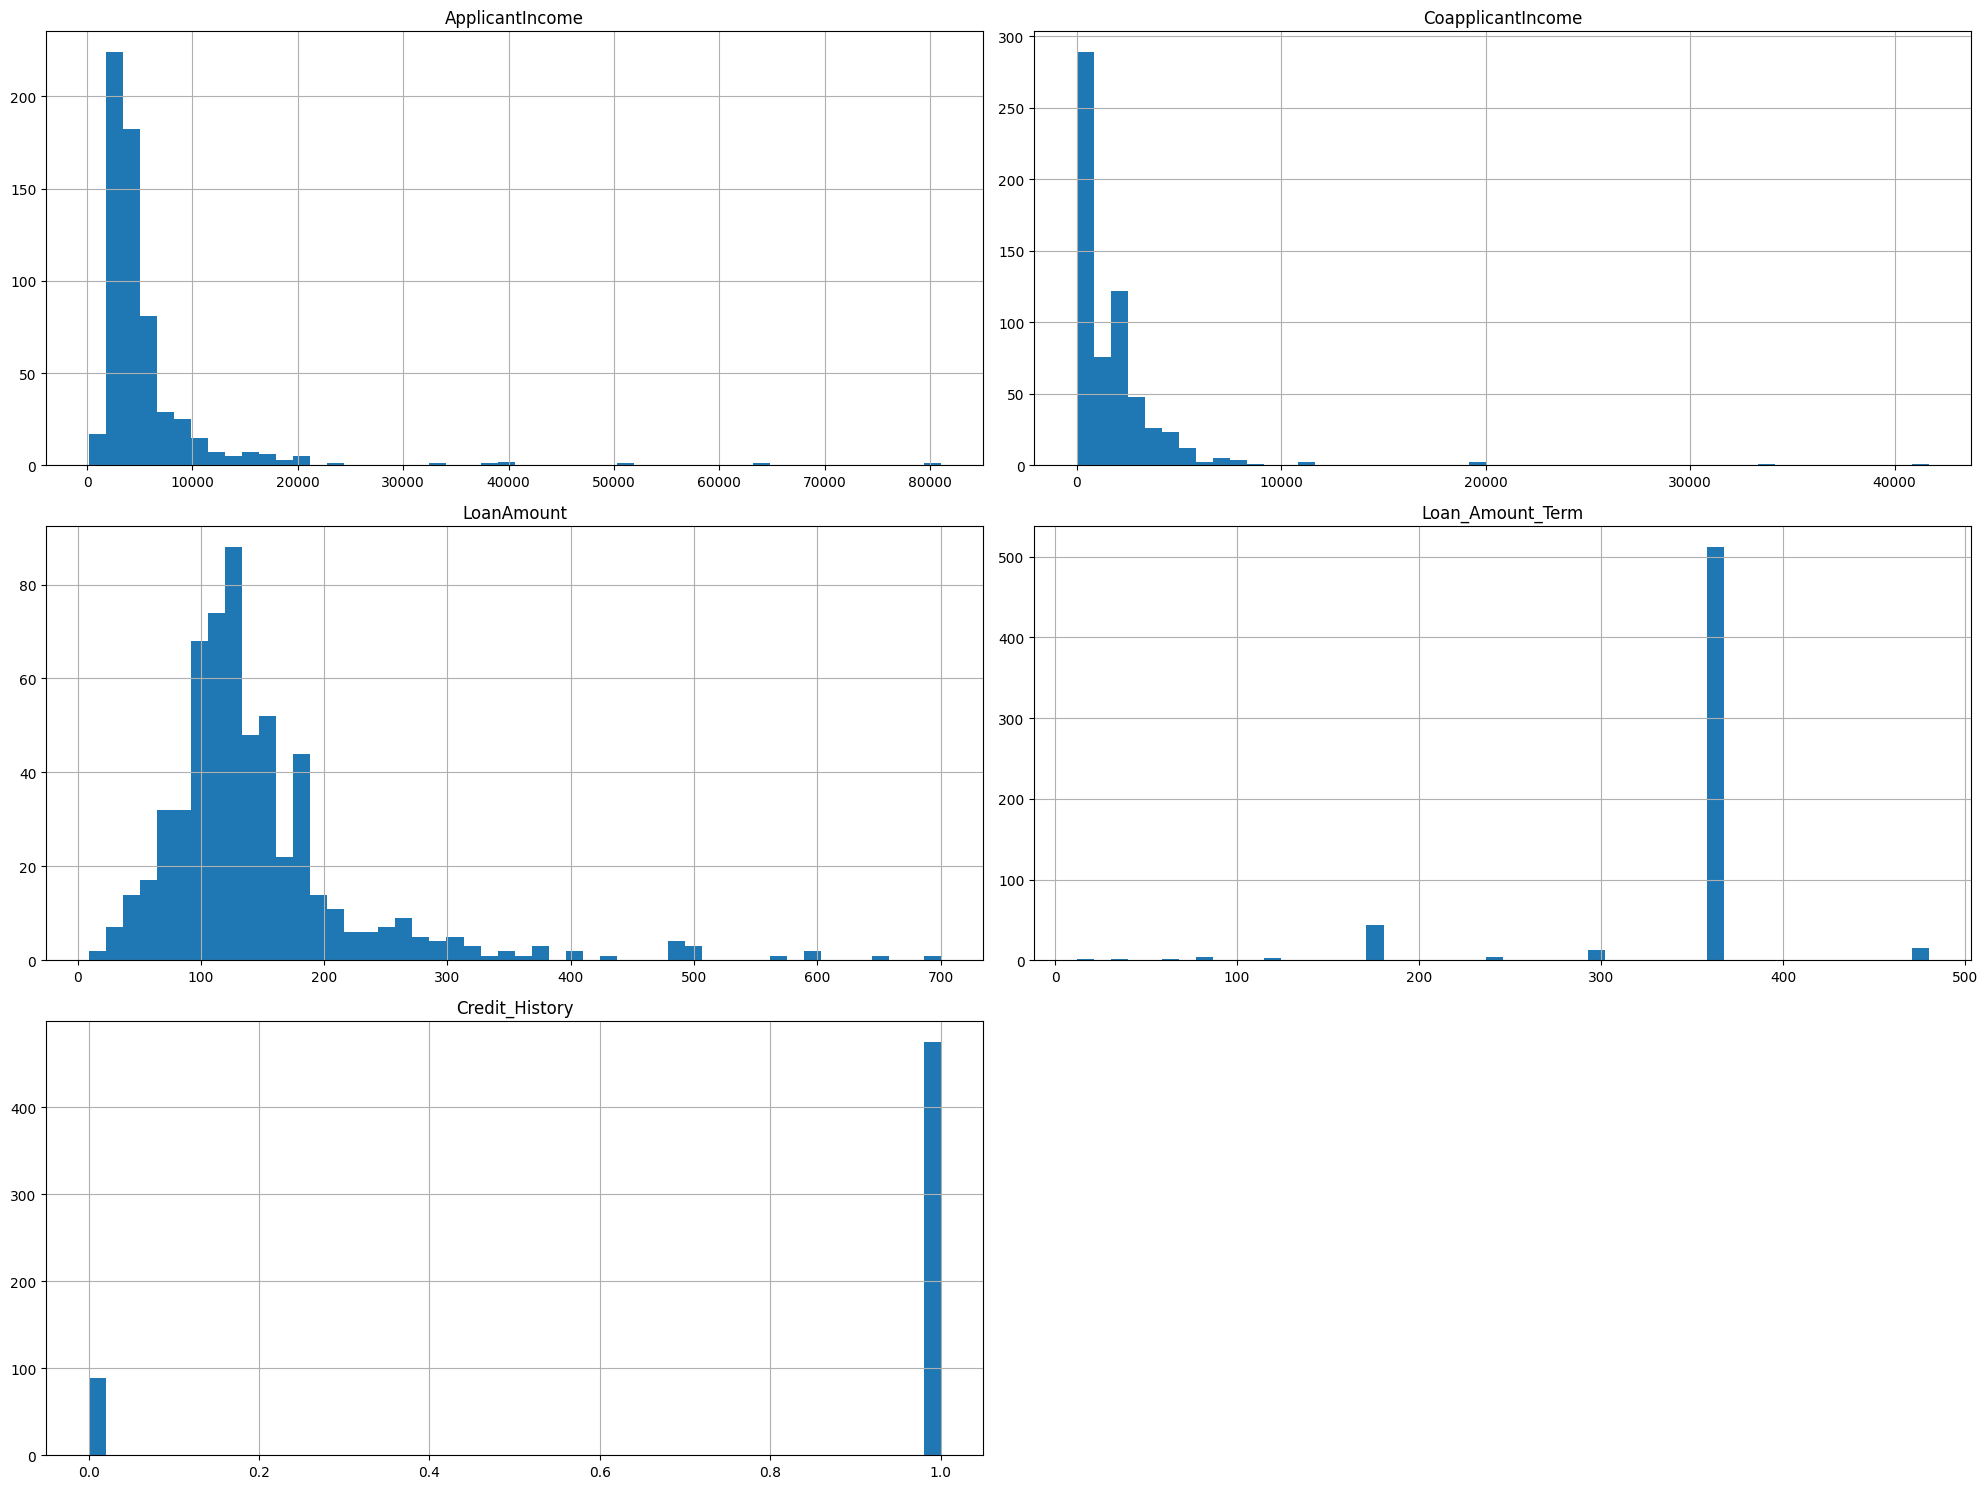

In [17]:
# distribution of values in each column
df.hist(bins=50, figsize=(20,15))
plt.tight_layout()    
plt.show()

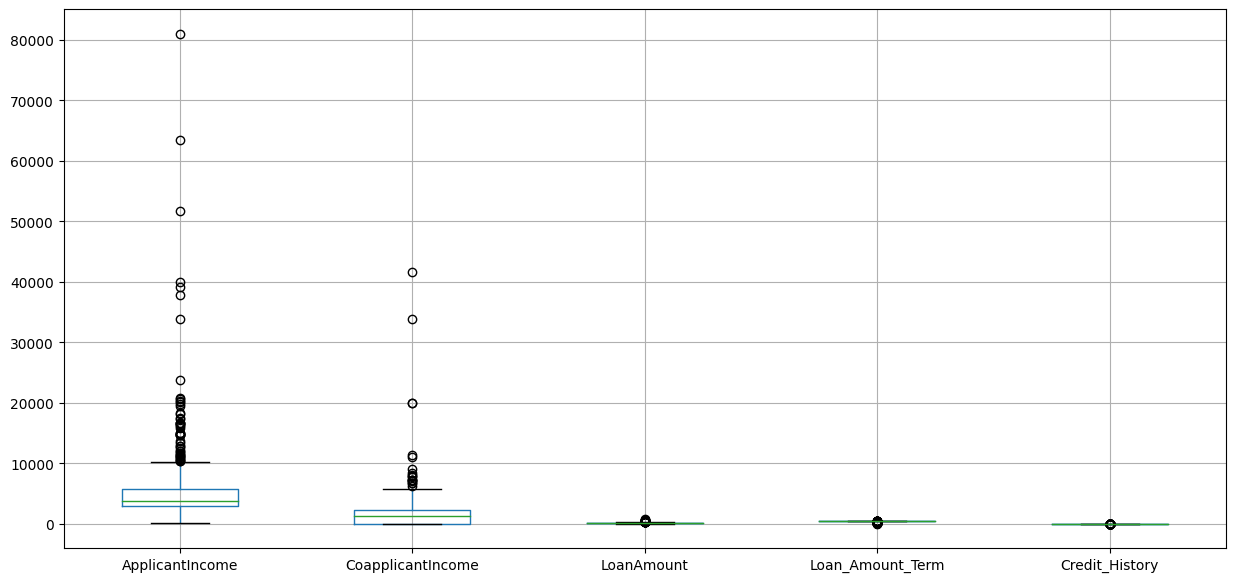

In [18]:
# boxplot shows the distribution in a graph.. IQR, outliers
plt.figure(figsize=(15, 7))
df.boxplot()
plt.show()

In [19]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [20]:
# replacing the outliers with medians
# the outliers highly influence the mean value of the variable, replacing them with median is better since outliers have little effect on the median 
median_ApplicantIncome = df.loc[df['ApplicantIncome'] > 10000, 'ApplicantIncome'].median()
df["ApplicantIncome"] = np.where(df["ApplicantIncome"] > 10000, median_ApplicantIncome, df['ApplicantIncome'])

median_CoapplicantIncome = df.loc[df['CoapplicantIncome'] > 5000, 'CoapplicantIncome'].median()
df["CoapplicantIncome"] = np.where(df["CoapplicantIncome"] > 5000, median_CoapplicantIncome, df['CoapplicantIncome'])

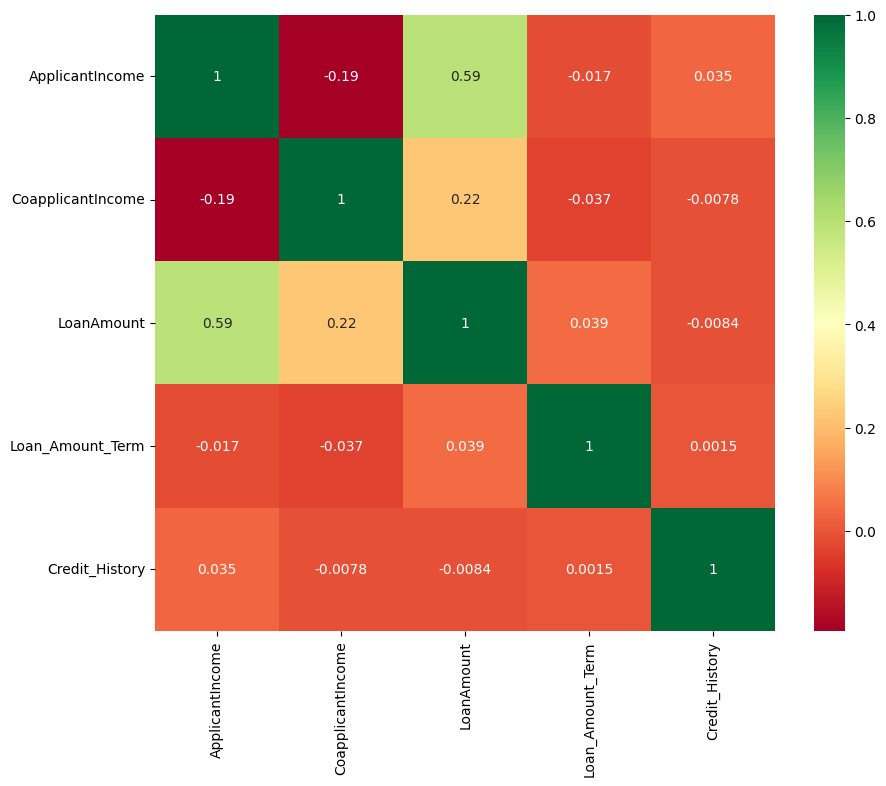

In [21]:
# correlation between numerical variables
# e.g. highest correlation of 0.59 between LoanAmount and ApplicantIncome means its more likely that higher Income will have higher Loans
# e.g. IF it was -0.59, it means that higher Income would have lower Loans
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [22]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

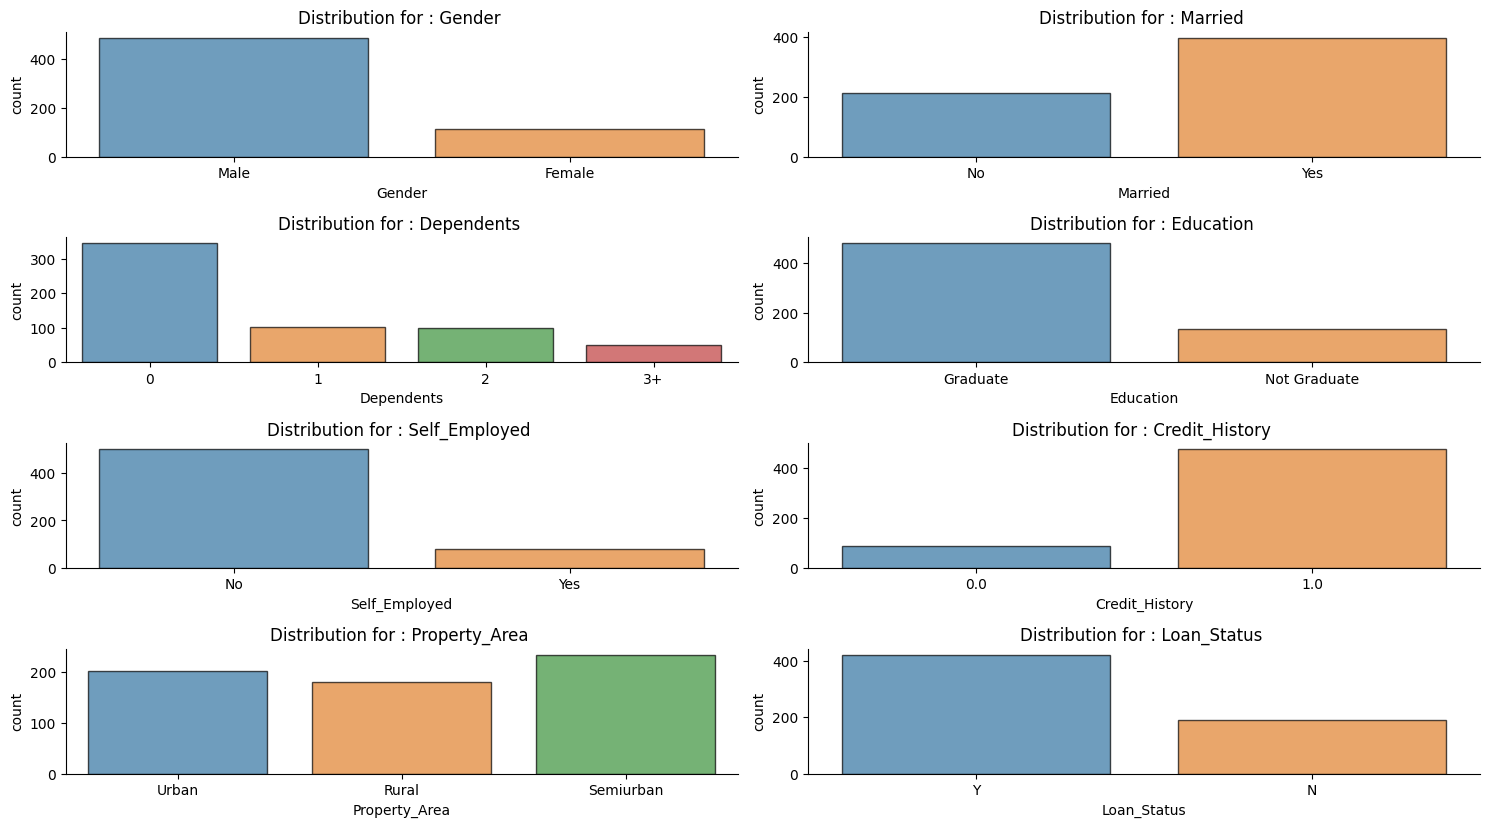

In [23]:
#barplots showing the frequency of each category 
# visually checking if data is biased.. many uneven distrubition in this data
plt.figure(figsize=[15,10])
fft=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']
n=1
for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f,  edgecolor="black", alpha=0.7, data=df)
    sns.despine()
    plt.title("Distribution for : {} ".format(f))
    n=n+1
plt.tight_layout()
plt.show()

In [24]:
df = df.dropna()

In [25]:
df.isnull().sum().sum()

0

### Train & Test Split

In [46]:
# seed is a random number used when defining the model to reproduce the same results when re-running the code
seed = 7
X, y = df.drop('Loan_Status', axis=1), df["Loan_Status"]

In [47]:
X['Dependents'].head()

1    1
2    0
3    0
4    0
5    2
Name: Dependents, dtype: object

In [48]:
# mapping is applying your defined function to each element of the collection
# here, we're making the Dependents column's string values of '0','1','2','3+' to numeric of 0,1,2,3
### Machine learning models require all input and output variables to be numeric
dep_map = {
    '0':0,
    '1':1,
    '2':2,
    '3+':3
}
X['Dependents'] = X['Dependents'].map(dep_map)
X['Dependents'].head()

1    1
2    0
3    0
4    0
5    2
Name: Dependents, dtype: int64

In [49]:
# One-hot encoding for categorical variables
# converting categorical/string variables to numeric for the ML models
# if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model
cat_features = []
for col in X.columns :
    if X[col].dtype == 'object' :
        cat_features.append(col)
cat_features

['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

In [50]:
# the categorical features/variables/columns 
for col in X.columns:
    if col in cat_features:
        print(X[col].unique())

['Male' 'Female']
['Yes' 'No']
['Graduate' 'Not Graduate']
['No' 'Yes']
['Rural' 'Urban' 'Semiurban']


In [51]:
# one-hot encoding to categorical variables will make it a 0/1 for the category
# e.g. Gender will now be Male (1 for if values was Male, and 0 for if value is Female)
dummies_gender = pd.get_dummies(X['Gender'], drop_first=True)
dummies_married = pd.get_dummies(X['Married'], prefix = 'Married', drop_first=True)
dummies_self_emp = pd.get_dummies(X['Self_Employed'], prefix = 'Self_Employed', drop_first=True)
dummies_edu = pd.get_dummies(X['Education'], drop_first=True)
dummies_prop = pd.get_dummies(X['Property_Area'], drop_first=True)

In [52]:
encode_df = pd.concat([dummies_gender, dummies_married, dummies_self_emp, dummies_edu, dummies_prop], axis=1)
encode_df.head()

,Male,Married_Yes,Self_Employed_Yes,Not Graduate,Semiurban,Urban
1,1,1,0,0,0,0
2,1,1,1,0,0,1
3,1,1,0,1,0,1
4,1,0,0,0,0,1
5,1,1,1,0,0,1


In [53]:
# dropping the original categorical string columns
X.drop(cat_features, axis=1, inplace=True)

In [54]:
X = pd.concat([X, encode_df], axis=1)
X.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Married_Yes,Self_Employed_Yes,Not Graduate,Semiurban,Urban
1,1,4583.0,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
2,0,3000.0,0.0,66.0,360.0,1.0,1,1,1,0,0,1
3,0,2583.0,2358.0,120.0,360.0,1.0,1,1,0,1,0,1
4,0,6000.0,0.0,141.0,360.0,1.0,1,0,0,0,0,1
5,2,5417.0,4196.0,267.0,360.0,1.0,1,1,1,0,0,1


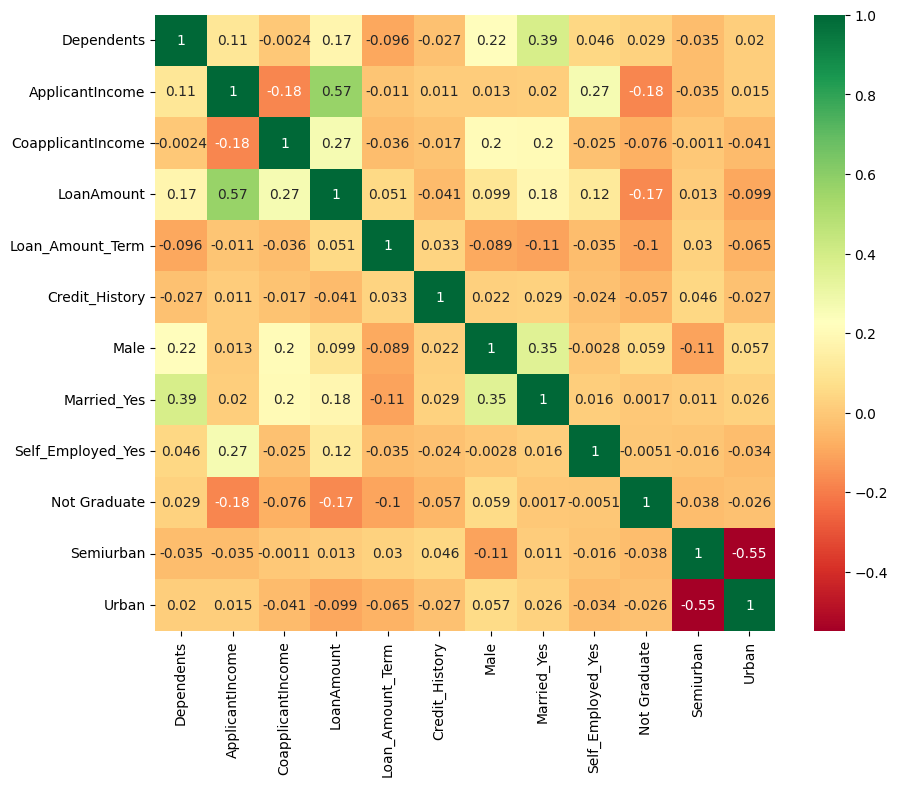

In [55]:
# correlation between all variables
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [56]:
# converting target Loan_Status of Y or N to a 1 or 0
y_2 = []
for x in y:
    if x == "Y":
        y_2.append(1)
    else:
        y_2.append(0)

In [57]:
# 70-30% train test  split
# 70% data will be used to train the ML model, and tested on the 30% to see how accurately it predicts the Loan_Status
# train set represents the historical data used to predict the test data (future unseen data)
# since we have the test/future data, we evaluate how accurately the model predicts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed) 
print("Dataset:", len(X_train), "train +", len(X_test), "test")

Dataset: 336 train + 144 test


### Machine Learning

- Logistic regression
- Linear Support Vector Machines 
- Nearest Centroids 
- Decision Tree
- Random Forest

In [73]:
# libraries for machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import NearestCentroid 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [74]:
# making multiple different models and comparing their performance
# here, the Logistric Regression and Random Forest gave higher accuracy of ~80%
classifier_names = ["logistic regression", "linear SVM", "nearest centroids", "decision tree", "random forest"]
classifiers = [LogisticRegression(), LinearSVC(), NearestCentroid(), DecisionTreeClassifier(), RandomForestClassifier()]
        
cross_val_scores = []
test_accuracies = []

for classifier, name in zip(classifiers, classifier_names):
    classifier.fit(X_train, y_train) #fit trains the model
    scores = cross_val_score(classifier, X_train, y_train, cv=10) #10-fold cv
    cross_val_scores.append(np.mean(scores))

    y_pred = classifier.predict(X_test) #predict on the test set
    accuracy = accuracy_score(y_test, y_pred) #compute the test accuracy
    test_accuracies.append(accuracy)

    print(f'Classifier: {name}, Cross-validation score: {np.mean(scores)}, Test accuracy: {accuracy}')



Classifier: logistic regression, Cross-validation score: 0.8066844919786096, Test accuracy: 0.7916666666666666
Classifier: linear SVM, Cross-validation score: 0.6159536541889483, Test accuracy: 0.6527777777777778
Classifier: nearest centroids, Cross-validation score: 0.571301247771836, Test accuracy: 0.5555555555555556
Classifier: decision tree, Cross-validation score: 0.690463458110517, Test accuracy: 0.6875
Classifier: random forest, Cross-validation score: 0.8007130124777184, Test accuracy: 0.7638888888888888


In [ ]:
# you evaluated each model with a score by cross-validation
# https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
# link also explains how to fit with different parameters for more accuracy or better fit models (ours didnt have any parameters set, all default values)

### Feature Selection
- Bagging
- AdaBoost
- Voting classifier

In [67]:
# trying to fine-tune the models
# Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction
from sklearn.ensemble import BaggingClassifier
for i, classifier in enumerate(classifiers):
    bg = BaggingClassifier(classifier, max_samples=0.5, max_features=1.0, n_estimators=20, random_state=7)
    bg.fit(X_train, y_train)
    print("Bagging of {}".format(classifier_namess[i]), bg.score(X_test, y_test))


Bagging of logistic regression 0.7916666666666666
Bagging of linear SVM 0.6458333333333334
Bagging of nearest centroids 0.5555555555555556
Bagging of decision tree 0.7569444444444444
Bagging of random forest 0.7847222222222222


In [70]:
# meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases
from sklearn.ensemble import AdaBoostClassifier
# boosting - adaboost decision tree, random forest 

adb_dt = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators= 5, learning_rate=1, random_state=seed)
adb_rf = AdaBoostClassifier(RandomForestClassifier(), n_estimators= 5, learning_rate=1, random_state=seed)

adb_dt.fit(X_train, y_train)
print("AdaBoostClassifying of DecisionTree: ", adb_dt.score(X_test, y_test))
adb_rf.fit(X_train, y_train)
print("AdaBoostClassifying of RandomForest: ", adb_rf.score(X_test, y_test))

AdaBoostClassifying of DecisionTree:  0.6527777777777778
AdaBoostClassifying of RandomForest:  0.7708333333333334


In [71]:
# A voting classifier is a machine learning estimator that trains various base models or estimators and predicts on the basis of aggregating the findings of each base estimator.
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier([("logistic regression", LogisticRegression(C=100)),
                           ("random forest", RandomForestClassifier()),
                          ],
                         voting = "soft") 
voting.fit(X_train, y_train)
print("VotingClassifiers:", voting.score(X_test, y_test))

VotingClassifiers: 0.7916666666666666


### Feature Importance 
DecisionTreeClassifier

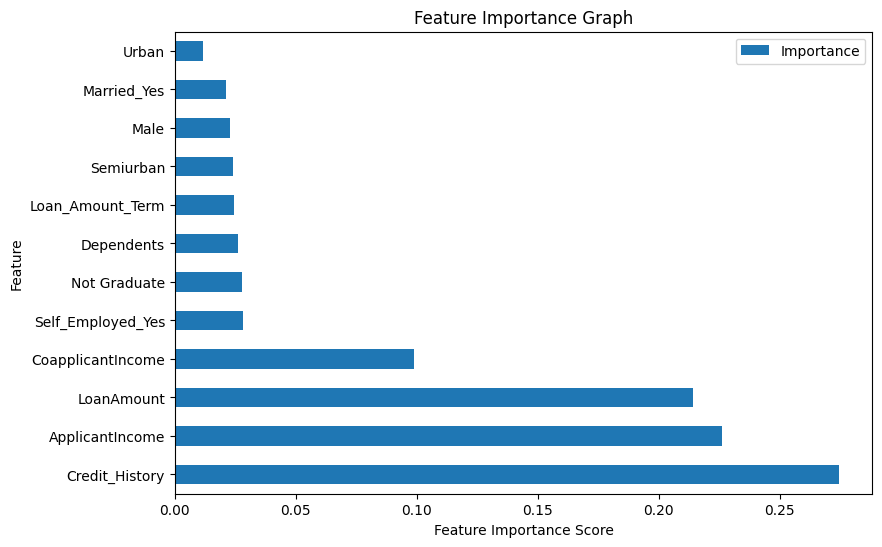

In [72]:
# using a decisiontreeclassifier ML model, seeing the importance of each variable for the model
# CreditHistory, LoanAmount, Income are most important variables for predicting Loan eligibility
dt = DecisionTreeClassifier().fit(X_train, y_train)
fea_imp = pd.DataFrame({'Importance':dt.feature_importances_}) 
fea_imp['Feature'] = X_train.columns
fea_imp.sort_values(by='Importance', ascending=False, inplace=True)
fea_imp = fea_imp.set_index('Feature', drop=True)
fea_imp.plot.barh(title='Feature Importance Graph', figsize=(9,6))
plt.xlabel('Feature Importance Score')
plt.show()

### The Logistic Regression Model gave the best result with test accuracy **0.79**. Thus, we choose the logistic model. The ultimate goal of financial quantitative analysis is to use quantifiable statistics and metrics to assist investors in making profitable investment decisions.

## Thank You